Task
Given the 50 cities and the pairwise cost of travelling to those cities, implement the simple hill climbing algorithm. Run the algorithm 10 times and report back the results. One way to report back the results is to present the convergence of the cost function. This must be done using the distance matrix of 50 cities provided with this activity.

Step 1 : Initial Solution: You can construct your own initial solution (based on either the random or greedy approach).

Step 2 : Neighbourhood operator: Do a swap of two adjacent cities

Step 3 : Solution evaluation: Add the cost of travelling through the cities

Step 4 : Stopping criteria: No improvement is 25 iterations

In [67]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [60]:
file_path = 'Travelling Salesman.xlsx'

In [61]:
df = pd.read_excel(file_path)

In [62]:
# Convert the dataframe to a NumPy array, skipping the first column which contains city names
df_distance_matrix = df.iloc[:, 1:].to_numpy()

In [63]:
def calculate_cost(solution, distance_matrix):
    """Calculate the total cost (distance) for the given solution."""
    total_cost = 0
    for i in range(len(solution) - 1):
        total_cost += distance_matrix[solution[i], solution[i + 1]]
    total_cost += distance_matrix[solution[-1], solution[0]]  # Return to the start city
    return total_cost

In [64]:
def generate_neighbour(solution):
    """Generate a new solution (st) by swapping two adjacent cities."""
    new_solution = solution[:]
    i = random.randint(0, len(new_solution) - 1)
    
    # Swap adjacent cities based on the value of i
    if i == len(new_solution) - 1:
        # Swap the last city with the first one
        new_solution[i], new_solution[0] = new_solution[0], new_solution[i]
    else:
        # Swap city i with city i+1
        new_solution[i], new_solution[i + 1] = new_solution[i + 1], new_solution[i]
    
    return new_solution

In [86]:
def hill_climbing_algorithm_with_plot(distance_matrix, max_iterations=25):
    """Hill climbing algorithm based on the provided description."""
    # A: Create the initial random solution s (50 cities)
    s = list(range(len(distance_matrix)))
    random.shuffle(s)
    
    # B: Calculate the cost of the initial solution s
    current_cost = calculate_cost(s, distance_matrix)
    cost_history = [current_cost] # Store the cost at each iteration for plotting
    
    # Repeat the process for a number of iterations
    for _ in range(max_iterations):
        # C: Generate a neighbour st by swapping adjacent cities
        st = generate_neighbour(s)
        
        # D: Calculate the cost of the candidate solution st
        st_cost = calculate_cost(st, distance_matrix)
        
        # E: Compare C(s) and C(st)
        if st_cost < current_cost:
            # E-2: If C(st) is better, update s to st
            s = st
            current_cost = st_cost
        # Store the cost at each iteration
        cost_history.append(current_cost)
    
    # F: Output the final solution and its total cost
    return s, current_cost, cost_history

In [87]:
# Run the algorithm and get the cost history
final_solution, final_cost, cost_history = hill_climbing_algorithm_with_plot(df_distance_matrix)

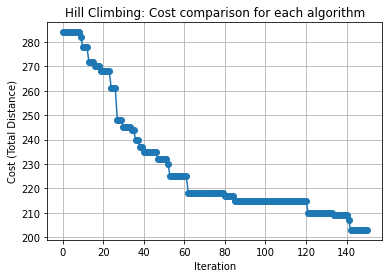

In [88]:
# Plotting the cost history
iterations = list(range(len(cost_history)))

plt.plot(iterations, cost_history, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Cost (Total Distance)')
plt.title('Hill Climbing: Cost comparison for each algorithm')
plt.grid(True)
plt.show()

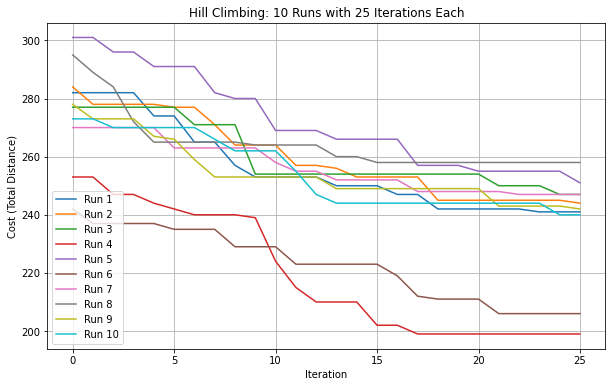

([4,
  43,
  5,
  49,
  44,
  11,
  34,
  30,
  25,
  10,
  26,
  14,
  2,
  12,
  41,
  38,
  40,
  28,
  13,
  8,
  36,
  33,
  37,
  42,
  31,
  6,
  22,
  47,
  16,
  23,
  7,
  39,
  15,
  19,
  9,
  1,
  48,
  3,
  21,
  29,
  17,
  46,
  18,
  0,
  20,
  45,
  24,
  32,
  35,
  27],
 199)

In [104]:
def plot_multiple_hill_climbing_runs_with_best(distance_matrix, num_runs=10, max_iterations=25):
    """Run the hill climbing algorithm multiple times, plot the cost history, and return the best cost and solution."""
    plt.figure(figsize=(10, 6))
    
    best_cost = float('inf')
    best_solution = None
    
    for run in range(num_runs):
        solution, cost, cost_history = hill_climbing_algorithm_with_plot(distance_matrix, max_iterations)
        iterations = list(range(len(cost_history)))
        plt.plot(iterations, cost_history, label=f'Run {run + 1}')
        
        # Track the best solution
        if cost < best_cost:
            best_cost = cost
            best_solution = solution
    
    plt.xlabel('Iteration')
    plt.ylabel('Cost (Total Distance)')
    plt.title(f'Hill Climbing: {num_runs} Runs with {max_iterations} Iterations Each')
    plt.grid(True)
    plt.legend()
    plt.show()
    
    # Return the best cost and best solution
    return best_solution, best_cost

# Run the algorithm 10 times, plot the results, and find the best cost and solution
best_solution, best_cost = plot_multiple_hill_climbing_runs_with_best(distance_matrix, num_runs=10, max_iterations=25)

best_solution, best_cost  # Output the best solution and cost
